A report from the Office of Homeland Security Statistics about admissions from DHS Form I-94/I-94W in 2023 can help us identify user profiles to keep in mind as we redesign the nonimmigrant visa application website.
 https://ohss.dhs.gov/sites/default/files/2024-09/2024_0906_ohss_nonimmigrant_fy2023_0.pdf

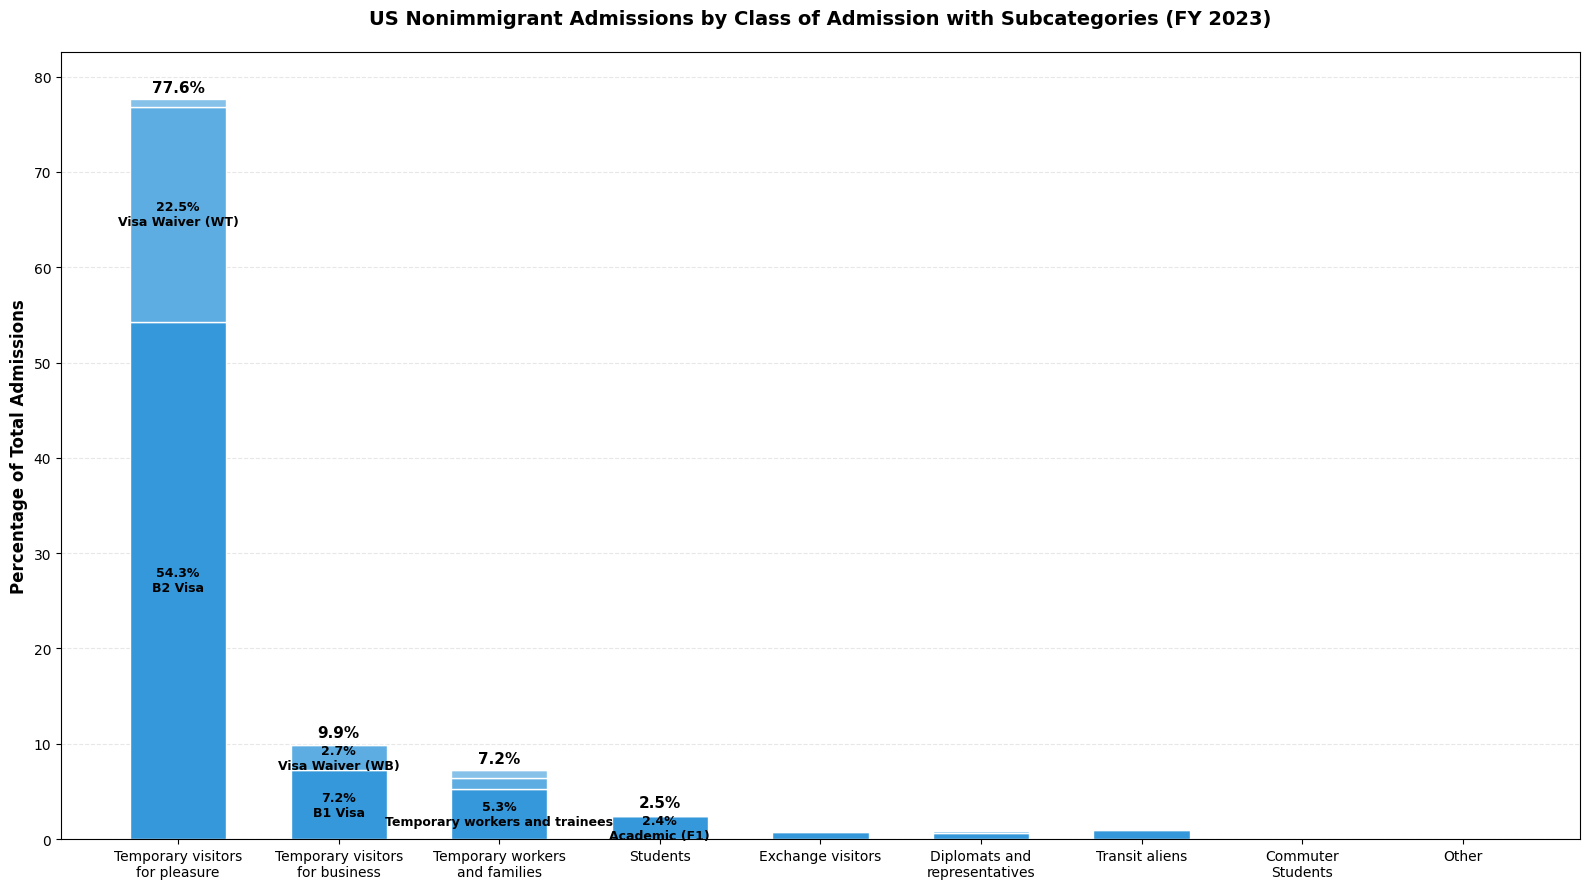


2023 Nonimmigrant Admissions Breakdown:

Temporary visitors for pleasure: 77.6%
  - B2 Visa: 54.3%
  - Visa Waiver (WT): 22.5%
  - CNMI (GMI): 0.8%

Temporary visitors for business: 9.9%
  - B1 Visa: 7.2%
  - Visa Waiver (WB): 2.7%

Temporary workers and families: 7.2%
  - Temporary workers and trainees: 5.3%
  - Intracompany transferees: 1.1%
  - Treaty traders and investors and spouses and children (E1 to E3): 0.8%

Students: 2.5%
  - Academic (F1): 2.4%
  - Spouses/children (F2, M2): 0.1%

Exchange visitors: 0.8%
  - Exchange visitors (J1): 0.7%
  - Spouses/children (J2): 0.1%

Diplomats and representatives: 0.9%
  - Diplomats (A): 0.6%
  - Int'l org reps (G): 0.2%
  - NATO (N): 0.1%

Transit aliens: 1.0%
  - Transit (C): 1.0%

Commuter Students: 0.0%

Other: 0.0%


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data organized by major category and subcategories
categories = ['Temporary visitors\nfor pleasure', 'Temporary visitors\nfor business',
              'Temporary workers\nand families',
              'Students', 'Exchange visitors', 'Diplomats and\nrepresentatives',
              'Transit aliens', 'Commuter\nStudents', 'Other']

# Subcategories for each major category (2023 percentages)
subcategories = {
    'Temporary visitors\nfor pleasure': {
        'B2 Visa': 54.3,
        'Visa Waiver (WT)': 22.5,
        'CNMI (GMI)': 0.8
    },
    'Temporary visitors\nfor business': {
        'B1 Visa': 7.2,
        'Visa Waiver (WB)': 2.7,
        'CNMI (GMB)': 0.0
    },
    'Temporary workers\nand families': {
        'Temporary workers and trainees': 5.3,
        'Intracompany transferees': 1.1,
        'Treaty traders and investors and spouses and children (E1 to E3)': 0.8,
        'Representatives of foreign media and spouses and children (I1)': 0.0
    },
    'Students': {
        'Academic (F1)': 2.4,
        'Vocational (M1)': 0.0,
        'Spouses/children (F2, M2)': 0.1
    },
    'Exchange visitors': {
        'Exchange visitors (J1)': 0.7,
        'Spouses/children (J2)': 0.1
    },
    'Diplomats and\nrepresentatives': {
        'Diplomats (A)': 0.6,
        'Int\'l org reps (G)': 0.2,
        'NATO (N)': 0.1
    },
    'Transit aliens': {
        'Transit (C)': 1.0,
        'Other transit': 0.0
    },
    'Commuter\nStudents': {
        'F3 & M3': 0.0
    },
    'Other': {
        'Fiancé(e)s (K)': 0.0,
        'Unknown': 0.0,
        'Other': 0.0
    }
}

# Create figure with larger size
fig, ax = plt.subplots(figsize=(16, 9))

# Color palette for subcategories
colors = ['#3498db', '#5dade2', '#85c1e9', '#aed6f1', '#d6eaf8']

x_pos = np.arange(len(categories))
bar_width = 0.6

# Plot each category with stacked subcategories
for i, category in enumerate(categories):
    bottom = 0
    subcat_data = subcategories[category]

    for j, (subcat, value) in enumerate(subcat_data.items()):
        color_idx = j % len(colors)
        ax.bar(i, value, bar_width, bottom=bottom,
               color=colors[color_idx], edgecolor='white', linewidth=1)

        # Add labels for larger values only
        if value >= 2.0:
            ax.text(i, bottom + value/2, f'{value:.1f}%\n{subcat}',
                   ha='center', va='center', fontsize=9, fontweight='bold')

        bottom += value

    # Add total at top of each bar
    if bottom >= 2.0:
        ax.text(i, bottom + 0.5, f'{bottom:.1f}%',
               ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

# Formatting
ax.set_ylabel('Percentage of Total Admissions', fontsize=12, fontweight='bold')
ax.set_title('US Nonimmigrant Admissions by Class of Admission with Subcategories (FY 2023)',
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x_pos)
ax.set_xticklabels(categories, fontsize=10, rotation=0, ha='center')
ax.set_ylim(0, max([sum(subcategories[cat].values()) for cat in categories]) + 5)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

# Print summary
print("\n2023 Nonimmigrant Admissions Breakdown:")
print("=" * 70)
for category in categories:
    total = sum(subcategories[category].values())
    print(f"\n{category.replace(chr(10), ' ')}: {total:.1f}%")
    for subcat, value in subcategories[category].items():
        if value > 0:
            print(f"  - {subcat}: {value:.1f}%")

Given that 97.5% of admissions fall into these three categories:
*   Temporary visitors for pleasure
*   Temporary visitors for business
*   Temporary workers and families

It may make sense to prioritize user experiences for these users. There are dozens of rare situations that add complicate any efforts to simplify the application all at once.

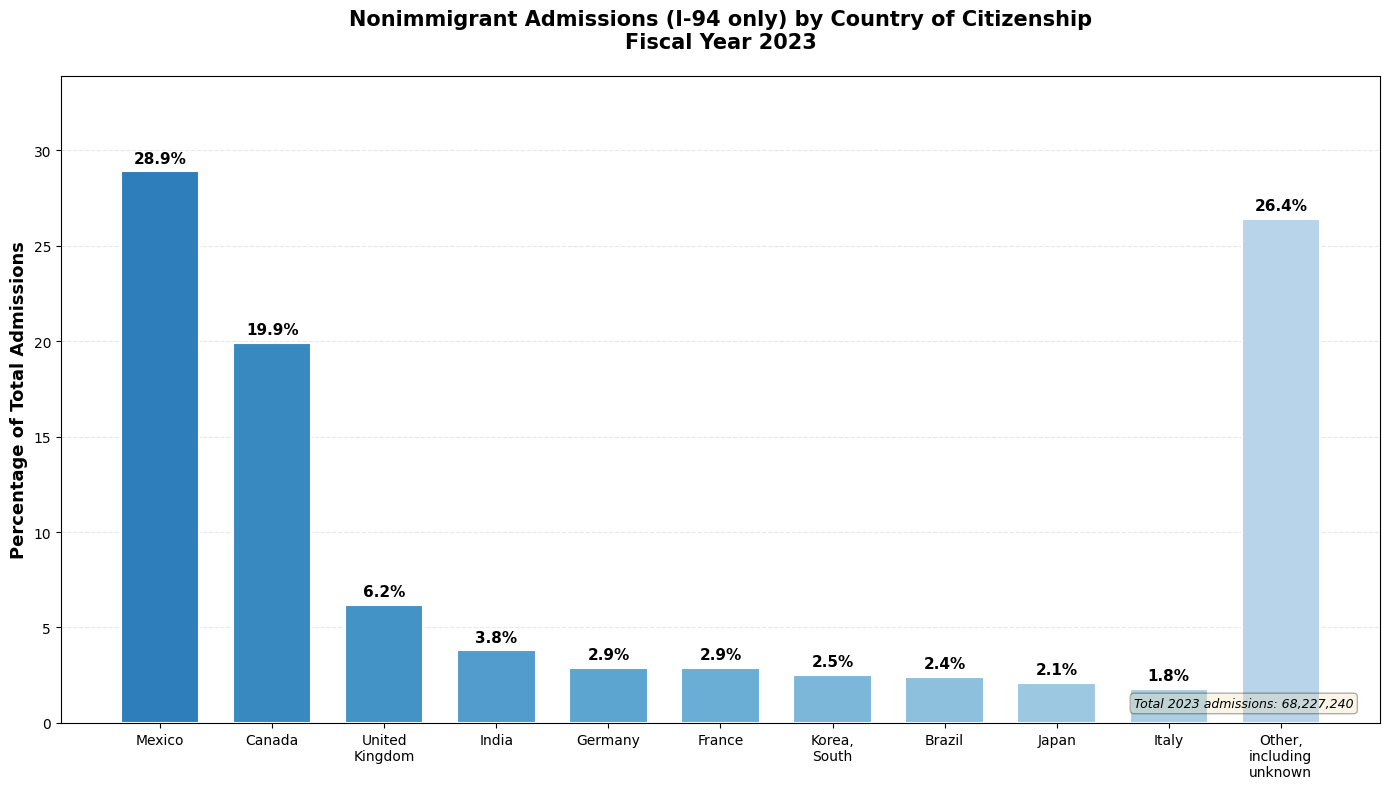


2023 Nonimmigrant Admissions by Country of Citizenship:
Country                        Percentage               Number
------------------------------------------------------------
Mexico                           28.9%             19,727,370
Canada                           19.9%             13,584,590
United Kingdom                    6.2%              4,260,040
India                             3.8%              2,599,630
Germany                           2.9%              1,990,460
France                            2.9%              1,964,840
Korea, South                      2.5%              1,699,890
Brazil                            2.4%              1,649,580
Japan                             2.1%              1,433,620
Italy                             1.8%              1,261,780
Other, including unknown         26.4%             18,055,440
------------------------------------------------------------
Total                                   100.0%      68,227,240


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for 2023 (percentages)
countries = ['Mexico', 'Canada', 'United\nKingdom', 'India', 'Germany',
             'France', 'Korea,\nSouth', 'Brazil', 'Japan', 'Italy',
             'Other,\nincluding\nunknown']

percentages_2023 = [28.9, 19.9, 6.2, 3.8, 2.9, 2.9, 2.5, 2.4, 2.1, 1.8, 26.4]

# Create figure
fig, ax = plt.subplots(figsize=(14, 8))

# Color palette - gradient from dark to light blue
colors = plt.cm.Blues(np.linspace(0.7, 0.3, len(countries)))

x_pos = np.arange(len(countries))
bar_width = 0.7

# Create bars
bars = ax.bar(x_pos, percentages_2023, bar_width, color=colors,
              edgecolor='white', linewidth=1.5)

# Add percentage labels on bars
for i, (bar, pct) in enumerate(zip(bars, percentages_2023)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.3,
            f'{pct:.1f}%',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# Formatting
ax.set_ylabel('Percentage of Total Admissions', fontsize=13, fontweight='bold')
ax.set_title('Nonimmigrant Admissions (I-94 only) by Country of Citizenship\nFiscal Year 2023',
             fontsize=15, fontweight='bold', pad=20)
ax.set_xticks(x_pos)
ax.set_xticklabels(countries, fontsize=10, ha='center')
ax.set_ylim(0, max(percentages_2023) + 5)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Add note about total
ax.text(0.98, 0.02, 'Total 2023 admissions: 68,227,240',
        transform=ax.transAxes, ha='right', va='bottom',
        fontsize=9, style='italic', bbox=dict(boxstyle='round',
        facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.show()

# Print summary
print("\n2023 Nonimmigrant Admissions by Country of Citizenship:")
print("=" * 60)
print(f"{'Country':<30} {'Percentage':<15} {'Number':>15}")
print("-" * 60)

numbers_2023 = [19727370, 13584590, 4260040, 2599630, 1990460,
                1964840, 1699890, 1649580, 1433620, 1261780, 18055440]

for country, pct, num in zip(countries, percentages_2023, numbers_2023):
    country_clean = country.replace('\n', ' ')
    print(f"{country_clean:<30} {pct:>6.1f}%        {num:>15,}")

print("-" * 60)
print(f"{'Total':<30} {'100.0%':>15} {68227240:>15,}")

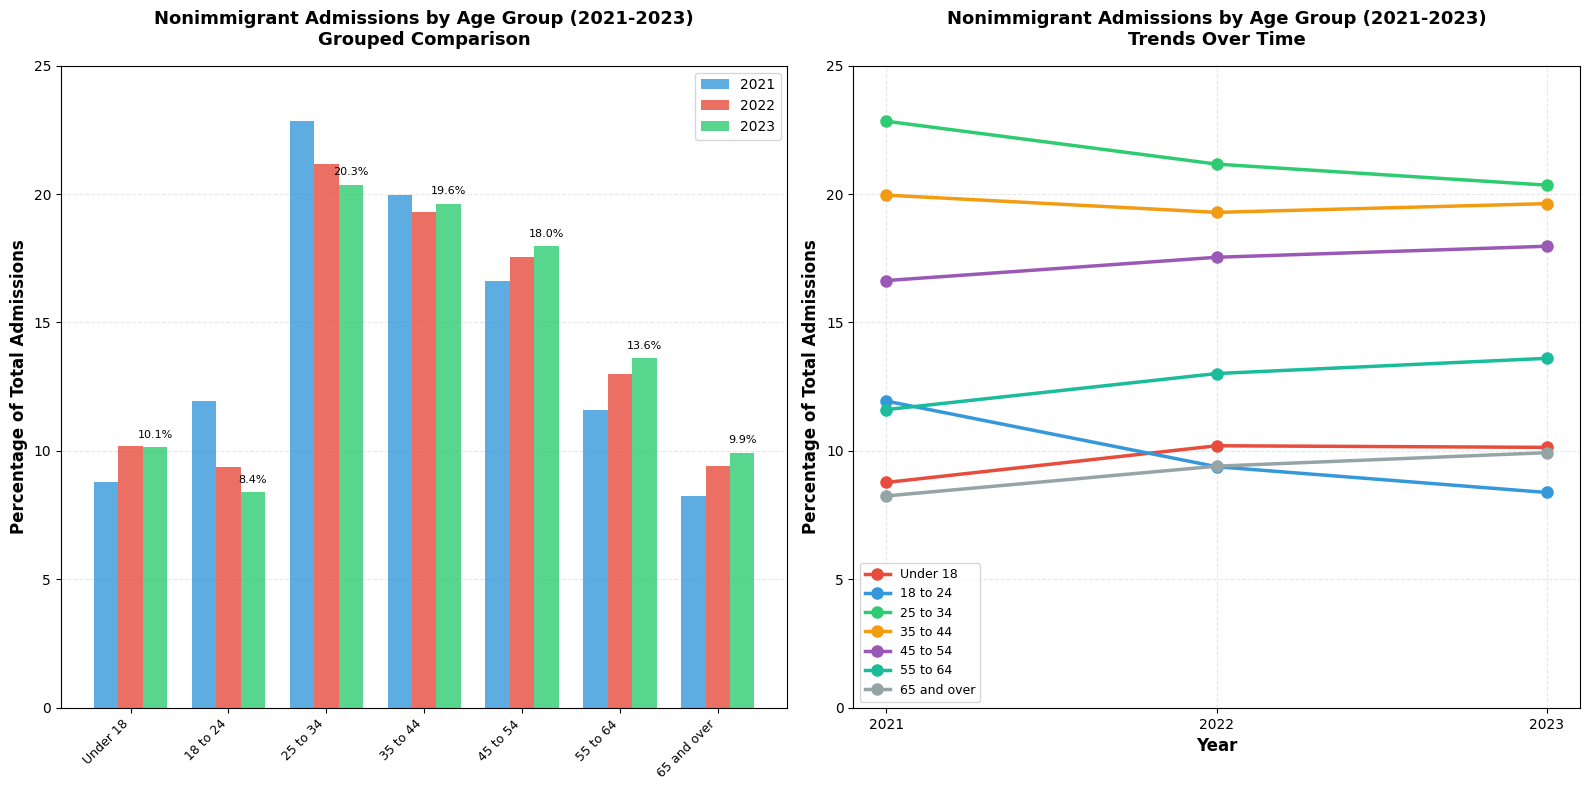


Nonimmigrant Admissions by Age Group: Percentage Distribution (2021-2023)
Age Group                       2021            2022            2023    Change 21-23
-------------------------------------------------------------------------------------
Under 18                        8.8%           10.2%           10.1%           1.4pp
18 to 24                       11.9%            9.4%            8.4%          -3.6pp
25 to 34                       22.8%           21.2%           20.3%          -2.5pp
35 to 44                       20.0%           19.3%           19.6%          -0.3pp
45 to 54                       16.6%           17.5%           18.0%           1.3pp
55 to 64                       11.6%           13.0%           13.6%           2.0pp
65 and over                     8.2%            9.4%            9.9%           1.7pp
-------------------------------------------------------------------------------------
Total                         100.0%          100.0%          100.0%

Not

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Age groups
age_groups = ['Under 18', '18 to 24', '25 to 34', '35 to 44',
              '45 to 54', '55 to 64', '65 and over']

# Total admissions by age group for each year
totals_2021 = [1195180, 1626680, 3110930, 2719050, 2265940, 1581570, 1123670]
totals_2022 = [4580150, 4213670, 9502930, 8659490, 7874610, 5842620, 4223120]
totals_2023 = [6917310, 5718530, 13881860, 13391290, 12259270, 9282390, 6776530]

# Grand totals
grand_total_2021 = 13623120
grand_total_2022 = 44897660
grand_total_2023 = 68227240

# Calculate percentages
percentages_2021 = [(x / grand_total_2021) * 100 for x in totals_2021]
percentages_2022 = [(x / grand_total_2022) * 100 for x in totals_2022]
percentages_2023 = [(x / grand_total_2023) * 100 for x in totals_2023]

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Left plot: Grouped bar chart
x = np.arange(len(age_groups))
width = 0.25

bars1 = ax1.bar(x - width, percentages_2021, width, label='2021', color='#3498db', alpha=0.8)
bars2 = ax1.bar(x, percentages_2022, width, label='2022', color='#e74c3c', alpha=0.8)
bars3 = ax1.bar(x + width, percentages_2023, width, label='2023', color='#2ecc71', alpha=0.8)

ax1.set_ylabel('Percentage of Total Admissions', fontsize=12, fontweight='bold')
ax1.set_title('Nonimmigrant Admissions by Age Group (2021-2023)\nGrouped Comparison',
              fontsize=13, fontweight='bold', pad=15)
ax1.set_xticks(x)
ax1.set_xticklabels(age_groups, fontsize=9, rotation=45, ha='right')
ax1.legend(fontsize=10)
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.set_axisbelow(True)
ax1.set_ylim(0, 25)

# Add value labels on bars for 2023
for bar in bars3:
    height = bar.get_height()
    if height > 1:
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.3,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=8)

# Right plot: Line chart showing trends over years
years = [2021, 2022, 2023]
colors_age = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c', '#95a5a6']

for i, age in enumerate(age_groups):
    percentages_by_year = [percentages_2021[i], percentages_2022[i], percentages_2023[i]]
    ax2.plot(years, percentages_by_year, marker='o', linewidth=2.5,
             markersize=8, label=age, color=colors_age[i])

ax2.set_xlabel('Year', fontsize=12, fontweight='bold')
ax2.set_ylabel('Percentage of Total Admissions', fontsize=12, fontweight='bold')
ax2.set_title('Nonimmigrant Admissions by Age Group (2021-2023)\nTrends Over Time',
              fontsize=13, fontweight='bold', pad=15)
ax2.set_xticks(years)
ax2.set_xticklabels(years, fontsize=10)
ax2.legend(fontsize=9, loc='best')
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.set_axisbelow(True)
ax2.set_ylim(0, 25)

plt.tight_layout()
plt.show()

# Print detailed table
print("\nNonimmigrant Admissions by Age Group: Percentage Distribution (2021-2023)")
print("=" * 85)
print(f"{'Age Group':<20} {'2021':>15} {'2022':>15} {'2023':>15} {'Change 21-23':>15}")
print("-" * 85)

for i, age in enumerate(age_groups):
    change = percentages_2023[i] - percentages_2021[i]
    print(f"{age:<20} {percentages_2021[i]:>14.1f}% {percentages_2022[i]:>14.1f}% "
          f"{percentages_2023[i]:>14.1f}% {change:>13.1f}pp")

print("-" * 85)
print(f"{'Total':<20} {'100.0%':>15} {'100.0%':>15} {'100.0%':>15}")
print("\nNote: 'pp' = percentage points")
print(f"\nTotal Admissions - 2021: {grand_total_2021:,}")
print(f"Total Admissions - 2022: {grand_total_2022:,}")
print(f"Total Admissions - 2023: {grand_total_2023:,}")

Visitors under 18 make up 10% of those entering under nonimmigrant visas. They are less likely to be filling out the nonimmigrant visa application themselves, and may have a family member doing it for them.

US Federal government workforce data from Fedscope shows that the number of employees in the 0967 (Passpart and Visa Examining) job series increased between 2020 and 2024. (See https://www.fedscope.opm.gov/ibmcognos/bi/v1/disp?b_action=powerPlayService&m_encoding=UTF-8&BZ=1AAACNygsBXN42o2QP2%7ECMBDFv4wvwAA6XwjFQ4bETgQDCX%7ESoVOVBoMQIUEmDPTTVyYFVMTQO1l3_vm9J8vOKh2ssnQZTZV%7Eamqjp6oLRLvhaBR4hN5bFHtDIdQYXR6PpAopdIUnx0DUc6w3CpZyMg_yiQ8UF3XV6KoBijd1udYGvBCGWOUHDa7qzPNin2%7E16TM6HMv6ctBV0wFPAcXH9uav%7EKECwszoag2E3Q_dm35T9_3sWbujVnIg0ySJZDZNkySYRf4%7ErE648DcoGEdEzpExhsxDRshsM5YWxfmYN7u6AkIgGxCUJaCY1SebKs%7EGtPmLc24abQBFsNVVcXnSM6AxkItAmgN9AYkW8AdgS0BBgOKdL8BdAwr5DJJnYC1on6P2lHxbdje_wMlrzGwBubf1t%7Ei1rxvi%7EbT%7E0tYPKJKTLg%3D%3D)

However, this does not take into account layoffs in the Bureau of Consular Affairs in 2025. As many as 100 employees recieved reduction in force (RIF) notices. Though the Trump administration says front-line employees were not impacted, a reduced workforce risks increasing processing times for nonimmigrant visas. (See https://federalnewsnetwork.com/workforce/2025/07/we-did-not-expect-this-state-dept-laid-off-passport-planning-staff-after-telling-them-they-were-exempt/)

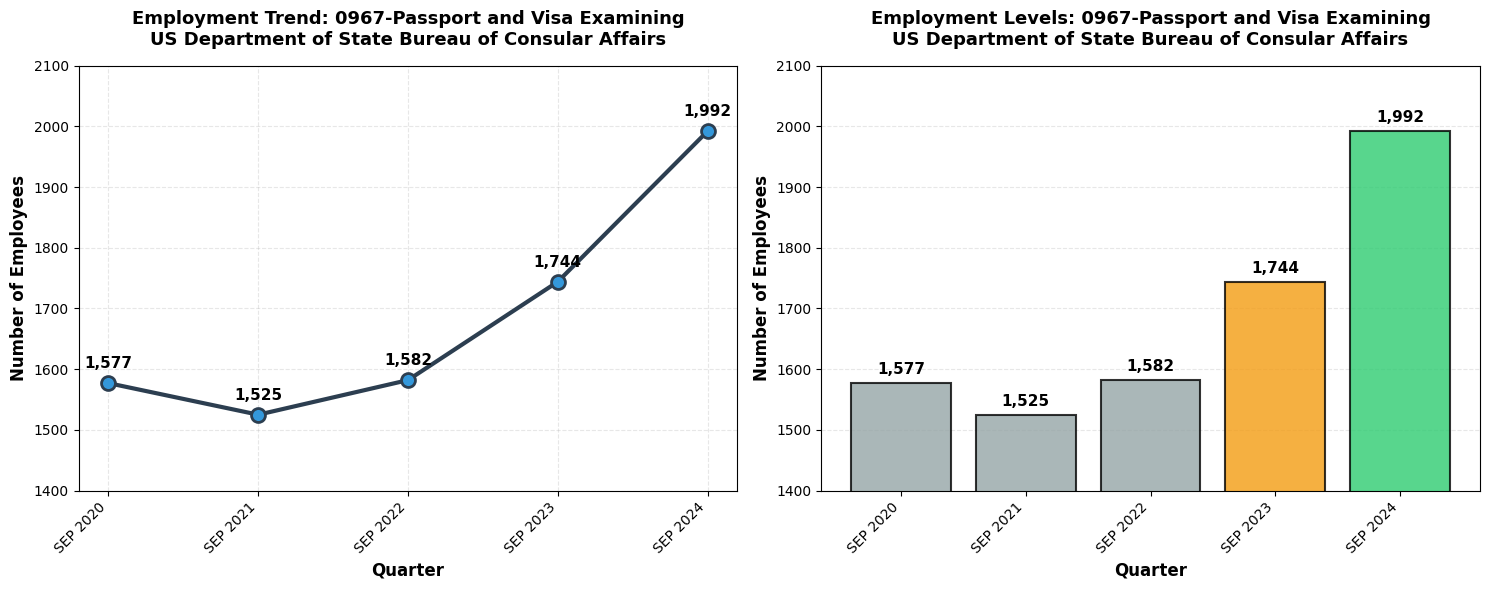


0967-PASSPORT AND VISA EXAMINING Employment Analysis
Quarter           Employment       Change     % Change
----------------------------------------------------------------------
SEP 2020               1,577            -            -
SEP 2021               1,525          -52        -3.3%
SEP 2022               1,582          +57        +3.7%
SEP 2023               1,744         +162       +10.2%
SEP 2024               1,992         +248       +14.2%
----------------------------------------------------------------------
Total Change                         +415       +26.3%

Most Current Quarter (SEP 2024): 1,992 employees
Peak Employment: 1,992 (SEP 2024)
Lowest Employment: 1,525 (SEP 2021)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
quarters = ['SEP 2020', 'SEP 2021', 'SEP 2022', 'SEP 2023', 'SEP 2024']
employment = [1577, 1525, 1582, 1744, 1992]

# Create figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Left plot: Line chart with markers
ax1.plot(quarters, employment, marker='o', linewidth=3, markersize=10,
         color='#2c3e50', markerfacecolor='#3498db', markeredgewidth=2,
         markeredgecolor='#2c3e50')

# Add value labels on points
for i, (quarter, value) in enumerate(zip(quarters, employment)):
    ax1.text(i, value + 20, f'{value:,}', ha='center', va='bottom',
             fontsize=11, fontweight='bold')

ax1.set_ylabel('Number of Employees', fontsize=12, fontweight='bold')
ax1.set_xlabel('Quarter', fontsize=12, fontweight='bold')
ax1.set_title('Employment Trend: 0967-Passport and Visa Examining\nUS Department of State Bureau of Consular Affairs',
              fontsize=13, fontweight='bold', pad=15)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_axisbelow(True)
ax1.set_ylim(1400, 2100)

# Rotate x-axis labels
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Right plot: Bar chart with growth highlighted
colors = ['#95a5a6', '#95a5a6', '#95a5a6', '#f39c12', '#2ecc71']
bars = ax2.bar(quarters, employment, color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 10,
            f'{int(height):,}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

ax2.set_ylabel('Number of Employees', fontsize=12, fontweight='bold')
ax2.set_xlabel('Quarter', fontsize=12, fontweight='bold')
ax2.set_title('Employment Levels: 0967-Passport and Visa Examining\nUS Department of State Bureau of Consular Affairs',
              fontsize=13, fontweight='bold', pad=15)
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax2.set_axisbelow(True)
ax2.set_ylim(1400, 2100)

# Rotate x-axis labels
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Print analysis
print("\n0967-PASSPORT AND VISA EXAMINING Employment Analysis")
print("=" * 70)
print(f"{'Quarter':<15} {'Employment':>12} {'Change':>12} {'% Change':>12}")
print("-" * 70)

for i in range(len(quarters)):
    if i == 0:
        print(f"{quarters[i]:<15} {employment[i]:>12,} {'-':>12} {'-':>12}")
    else:
        change = employment[i] - employment[i-1]
        pct_change = (change / employment[i-1]) * 100
        print(f"{quarters[i]:<15} {employment[i]:>12,} {change:>+12,} {pct_change:>+11.1f}%")

print("-" * 70)
total_change = employment[-1] - employment[0]
total_pct_change = (total_change / employment[0]) * 100
print(f"{'Total Change':<15} {'':<12} {total_change:>+12,} {total_pct_change:>+11.1f}%")
print(f"\nMost Current Quarter (SEP 2024): {employment[-1]:,} employees")
print(f"Peak Employment: {max(employment):,} (SEP 2024)")
print(f"Lowest Employment: {min(employment):,} (SEP 2021)")